# Airline passengers prediction

In this Keras project, we will discover how to build and train a convolution neural network for predicting airline passengers.

## Import the libraries:

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## load the dataset


In [4]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


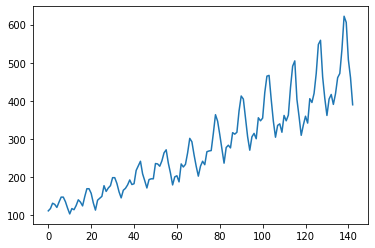

In [8]:
plt.plot(dataset)
plt.show()

## normalize the dataset


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split into train and test sets


In [10]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

95 48


## convert an array of values into a dataset matrix


In [12]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		dataX.append(dataset[i:(i+look_back), 0])
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

## reshape into X=t and Y=t+1


In [13]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [14]:
trainX.shape

(93, 1)

In [15]:
trainY.size

93

## reshape input to be [samples, time steps, features]


In [16]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


## building and training the model

In [17]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
93/93 - 5s - loss: 0.0662 - 5s/epoch - 52ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0339 - 193ms/epoch - 2ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0255 - 200ms/epoch - 2ms/step
Epoch 4/100
93/93 - 0s - loss: 0.0228 - 195ms/epoch - 2ms/step
Epoch 5/100
93/93 - 0s - loss: 0.0213 - 200ms/epoch - 2ms/step
Epoch 6/100
93/93 - 0s - loss: 0.0202 - 191ms/epoch - 2ms/step
Epoch 7/100
93/93 - 0s - loss: 0.0191 - 205ms/epoch - 2ms/step
Epoch 8/100
93/93 - 0s - loss: 0.0181 - 190ms/epoch - 2ms/step
Epoch 9/100
93/93 - 0s - loss: 0.0171 - 197ms/epoch - 2ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0162 - 202ms/epoch - 2ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0152 - 191ms/epoch - 2ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0143 - 201ms/epoch - 2ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0134 - 194ms/epoch - 2ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0125 - 200ms/epoch - 2ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0116 - 193ms/epoch - 2ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0106 - 195ms/epoc

## evaluate the results

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22.53 RMSE
Test Score: 54.13 RMSE


In [19]:
testX.shape[0]

46

## visualize the results

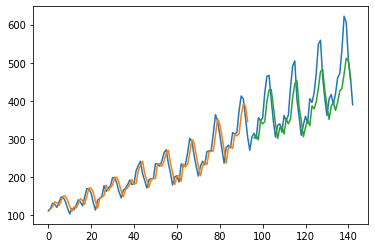

In [20]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()